In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import geodatasets  # Uses geodatasets to load Natural Earth data

# Define real Alaska Highway Pump Stations with actual coordinates
pump_stations_data = {
    "Station": [
        "Dawson Creek", "Fort Nelson", "Watson Lake", "Whitehorse",
        "Haines Junction", "Tok", "Delta Junction", "Fairbanks"
    ],
    "Longitude": [
        -120.2356, -122.6972, -128.7074, -135.0568,
        -137.5108, -143.9850, -145.7306, -147.7164
    ],
    "Latitude": [
        55.7606, 58.8056, 60.0635, 60.7212,
        60.7532, 63.3362, 64.0373, 64.8378
    ]
}

# Convert to GeoDataFrame
pump_stations = gpd.GeoDataFrame(
    pump_stations_data,
    geometry=gpd.points_from_xy(pump_stations_data["Longitude"], pump_stations_data["Latitude"]),
    crs="EPSG:4326"  # WGS 84
)

# Load Alaska Boundary using geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
alaska = world.to_crs(epsg=3338)  # **Alaska Albers Equal Area projection**

# Reproject Pump Stations
pump_stations = pump_stations.to_crs(epsg=3338)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Alaska boundary
alaska.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.7)

# Plot Pump Stations with names
pump_stations.plot(ax=ax, color="red", markersize=100, edgecolor="black", alpha=0.8, label="Pump Stations")

# Annotate station names
for x, y, label in zip(pump_stations.geometry.x, pump_stations.geometry.y, pump_stations["Station"]):
    ax.text(x, y, label, fontsize=10, ha="right", color="black", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Set the extent to cover Alaska and surroundings
ax.set_xlim([-2.5e6, 1.5e6])  # Adjust based on actual map extent
ax.set_ylim([5e5, 3e6])

# **Fix: Use an alternative basemap (ESRI or OpenStreetMap)**
ctx.add_basemap(ax, crs=pump_stations.crs, source=ctx.providers.Esri.WorldImagery)

# Labels & Legend
ax.set_title("Figure 1: Alaska Highway & Pump Stations", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show Plot
plt.show()


KeyboardInterrupt: 

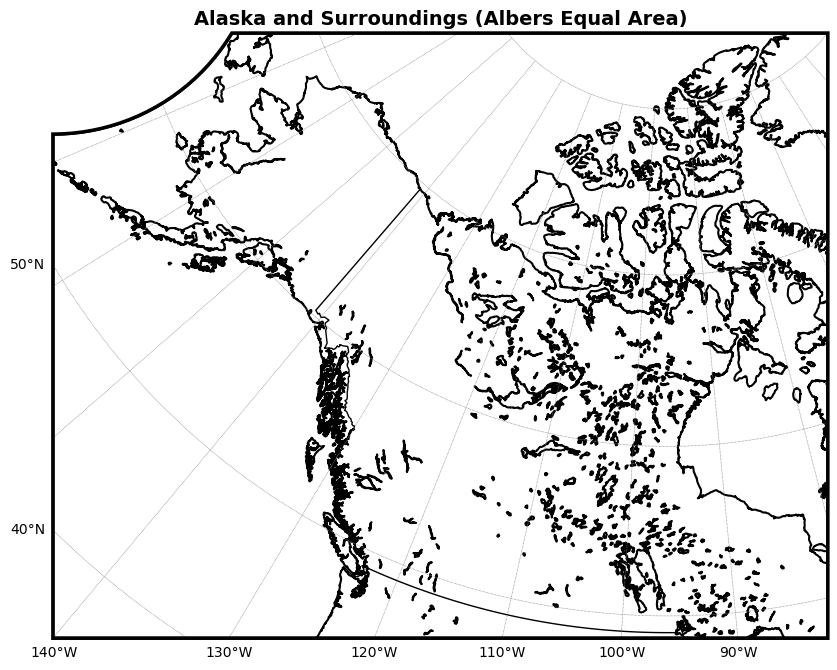

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

# Define the projection: Albers Equal Area centered on Alaska
#proj = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=65, standard_parallels=(35, 80))
proj = ccrs.AlbersEqualArea(central_longitude=-110, central_latitude=55, standard_parallels=(35, 70))

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

# Define Basemap with Alaska-centered extent
m = Basemap(projection='aea', resolution='i',
            llcrnrlon=-140, llcrnrlat=35,
            urcrnrlon=-40, urcrnrlat=80,
            lat_0=65, lon_0=-96, ax=ax)

# Draw Basemap features
m.drawmapboundary(fill_color='white', linewidth=2.5)
m.drawcoastlines(color='black', linewidth=1.5)
m.drawcountries(color='black', linewidth=1)
m.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0], dashes=[1, 1], linewidth=0.5, color='gray')
m.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1], dashes=[1, 1], linewidth=0.5, color='gray')

# Title
plt.title('Alaska and Surroundings (Albers Equal Area)', fontsize=14, fontweight='bold')

# Save and Show
#plt.savefig('alaska_map.png', bbox_inches="tight", dpi=300)
plt.show()


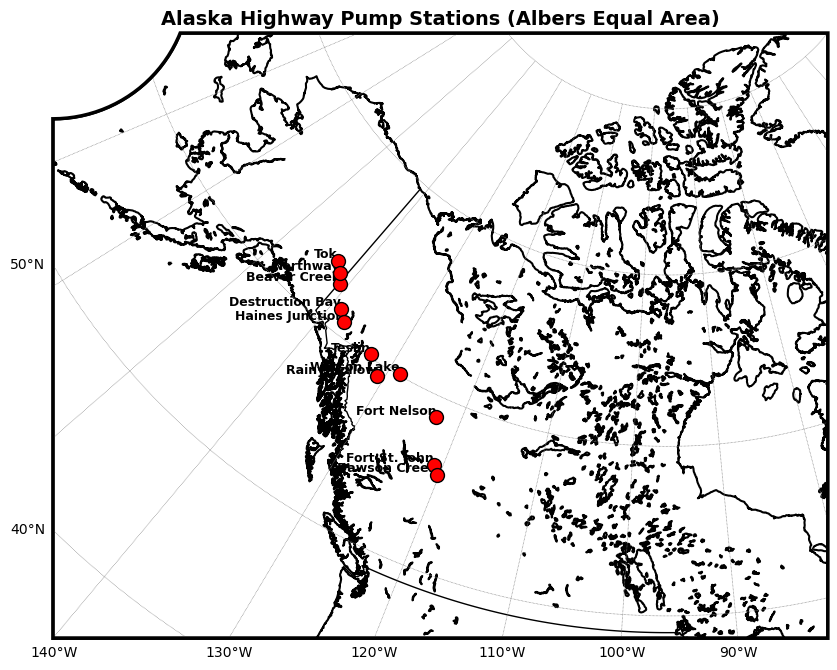

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point

# Define the projection: Albers Equal Area centered on Alaska
proj = ccrs.AlbersEqualArea(central_longitude=-110, central_latitude=55, standard_parallels=(50, 70))

# Real pump stations along the Alaska Highway with names
stations = [
    {"name": "Rainy Hollow", "lon": -130.8, "lat": 59.3},
    {"name": "Beaver Creek", "lon": -140.9, "lat": 62.4},
    {"name": "Tok", "lon": -143.0, "lat": 63.3},
    {"name": "Northway", "lon": -141.8, "lat": 62.9},
    {"name": "Destruction Bay", "lon": -138.8, "lat": 61.3},
    {"name": "Haines Junction", "lon": -137.5, "lat": 60.8},
    {"name": "Teslin", "lon": -132.7, "lat": 60.2},
    {"name": "Watson Lake", "lon": -128.7, "lat": 60.1},
    {"name": "Fort Nelson", "lon": -122.7, "lat": 58.8},
    {"name": "Fort St. John", "lon": -120.9, "lat": 56.2},
    {"name": "Dawson Creek", "lon": -120.2, "lat": 55.7},
]

# Convert to GeoDataFrame
gdf_stations = gpd.GeoDataFrame(
    stations, 
    geometry=[Point(st["lon"], st["lat"]) for st in stations], 
    crs="EPSG:4326"
)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

# Define Basemap with Alaska-centered extent
m = Basemap(projection='aea', resolution='i',
            llcrnrlon=-140, llcrnrlat=35,
            urcrnrlon=-40, urcrnrlat=80,
            lat_0=65, lon_0=-96, ax=ax)

# Draw Basemap features
m.drawmapboundary(fill_color='white', linewidth=2.5)
m.drawcoastlines(color='black', linewidth=1.5)
m.drawcountries(color='black', linewidth=1)
m.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0], dashes=[1, 1], linewidth=0.5, color='gray')
m.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1], dashes=[1, 1], linewidth=0.5, color='gray')

# Convert station points to map coordinates and plot
for station in stations:
    x, y = m(station["lon"], station["lat"])
    m.scatter(x, y, color='red', edgecolors='black', s=100, label="Pump Stations", zorder=5)
    plt.text(x, y, station["name"], fontsize=9, ha='right', va='bottom', fontweight='bold', color='black')

# Title
plt.title('Alaska Highway Pump Stations (Albers Equal Area)', fontsize=14, fontweight='bold')

# Save and Show
#plt.savefig('alaska_pump_stations.png', bbox_inches="tight", dpi=300)
plt.show()


🔹 Updated Script (Zoomed in on Rainy Hollow, Tok, and Northway) 


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


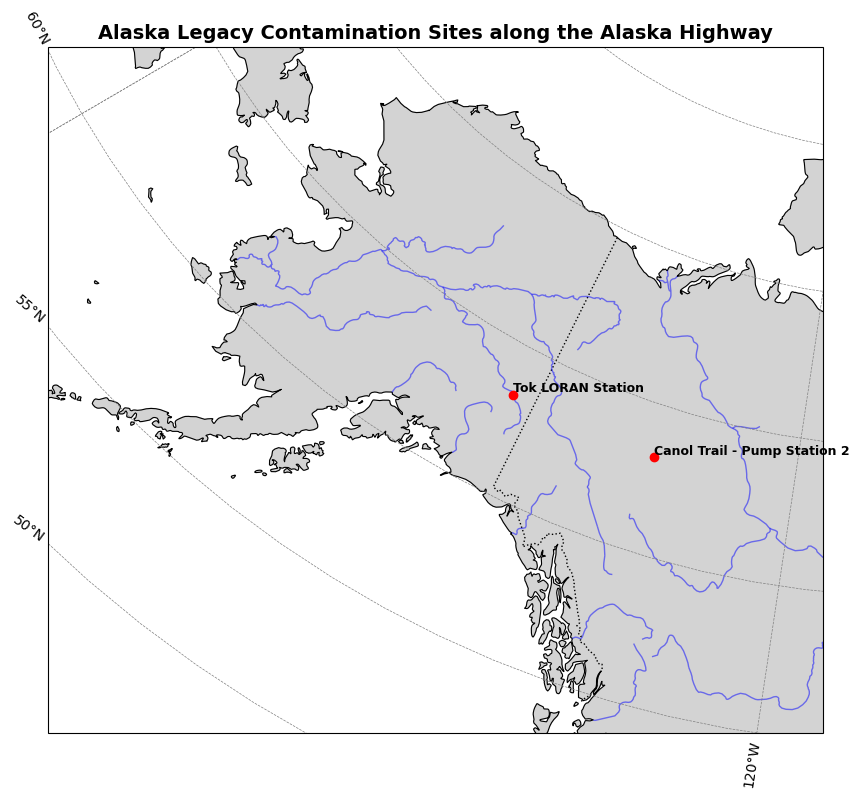

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from shapely.geometry import Point
import cartopy.mpl.gridliner as gridliner

# Define Alaska-focused projection: Albers Equal Area centered on Alaska
proj = ccrs.AlbersEqualArea(central_longitude=-110, central_latitude=55, standard_parallels=(50, 70))

# Define contamination sites in Alaska
sites = [
    {"name": "Tok LORAN Station", "lon": -142.8089, "lat": 63.3286},
    {"name": "Canol Trail - Pump Station 2", "lon": -130.98, "lat": 63.25},  # Approximate location
]

# Convert to GeoDataFrame
gdf_sites = gpd.GeoDataFrame(
    sites, geometry=[Point(site["lon"], site["lat"]) for site in sites], crs="EPSG:4326"
)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

# Add geographical features
ax.set_extent([-170, -120, 55, 70], crs=ccrs.PlateCarree())  # Alaska-focused extent
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)
ax.add_feature(cfeature.RIVERS, color="blue", alpha=0.5, linewidth=1)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels
gl.xlabel_style = {"size": 10}
gl.ylabel_style = {"size": 10}

# Plot contamination sites
for site in sites:
    ax.plot(site["lon"], site["lat"], marker="o", color="red", markersize=6,
            transform=ccrs.PlateCarree(), label=site["name"])
    ax.text(site["lon"], site["lat"], site["name"], transform=ccrs.PlateCarree(),
            fontsize=9, ha="left", va="bottom", fontweight="bold", color="black")

# Add title
plt.title("Alaska Legacy Contamination Sites along the Alaska Highway", fontsize=14, fontweight="bold")

# Show map
plt.show()



==== Processing RCP45 ====
Processing Runoff from cmip5_ensemble_wf_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


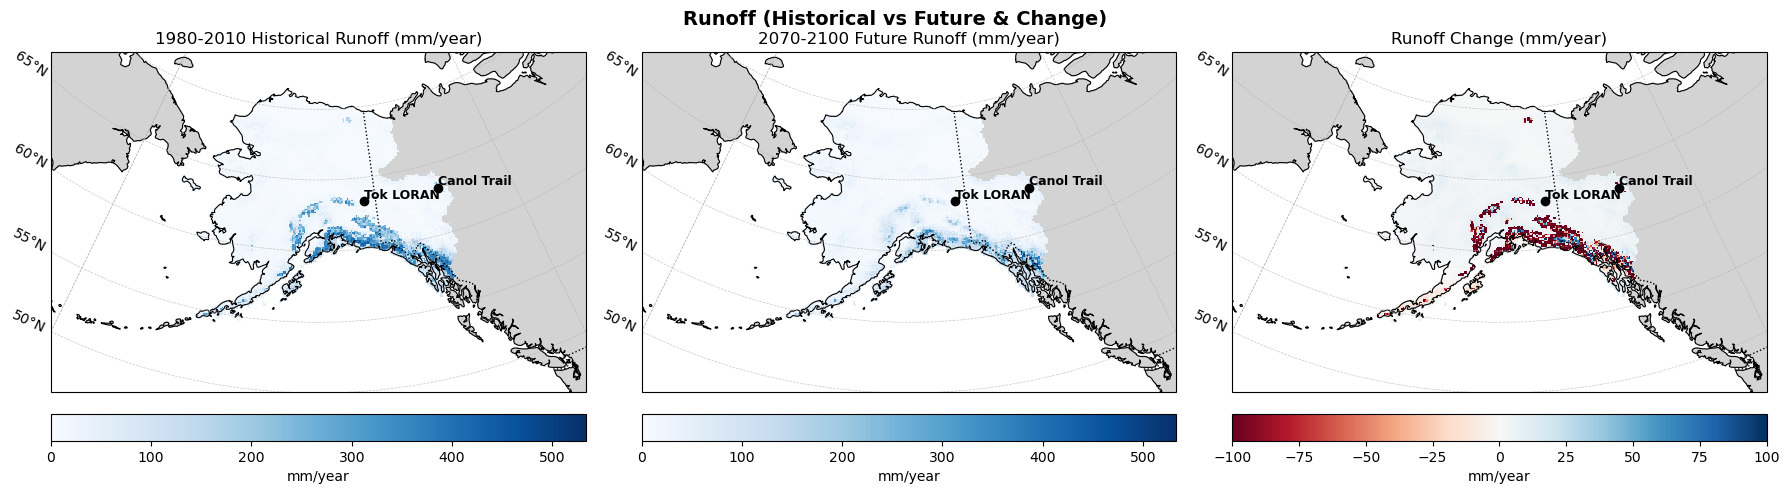

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


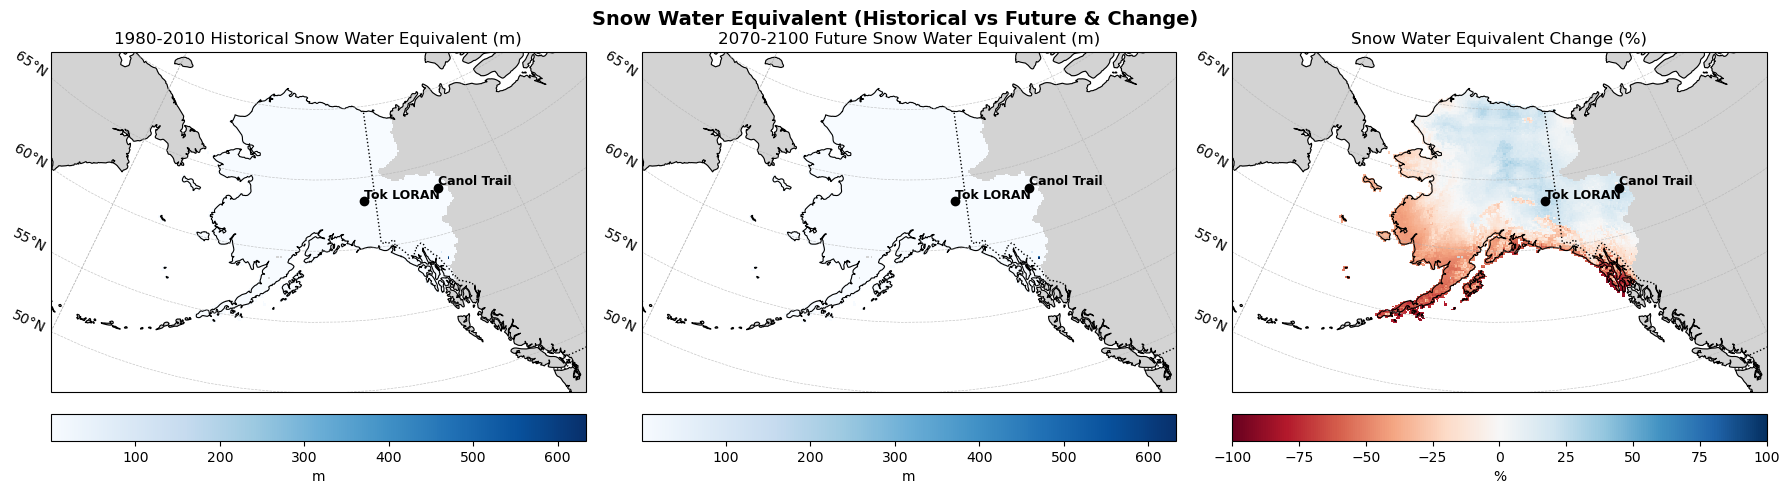

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


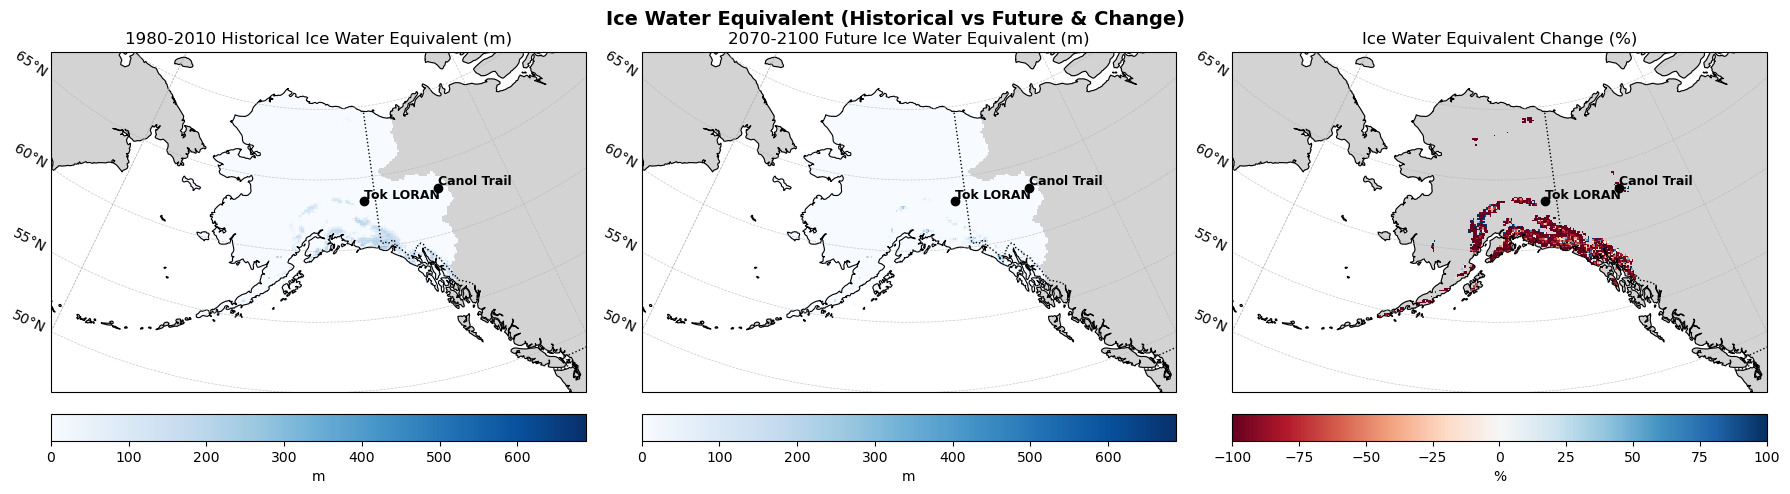


==== Processing RCP85 ====
Processing Runoff from cmip5_ensemble_wf_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


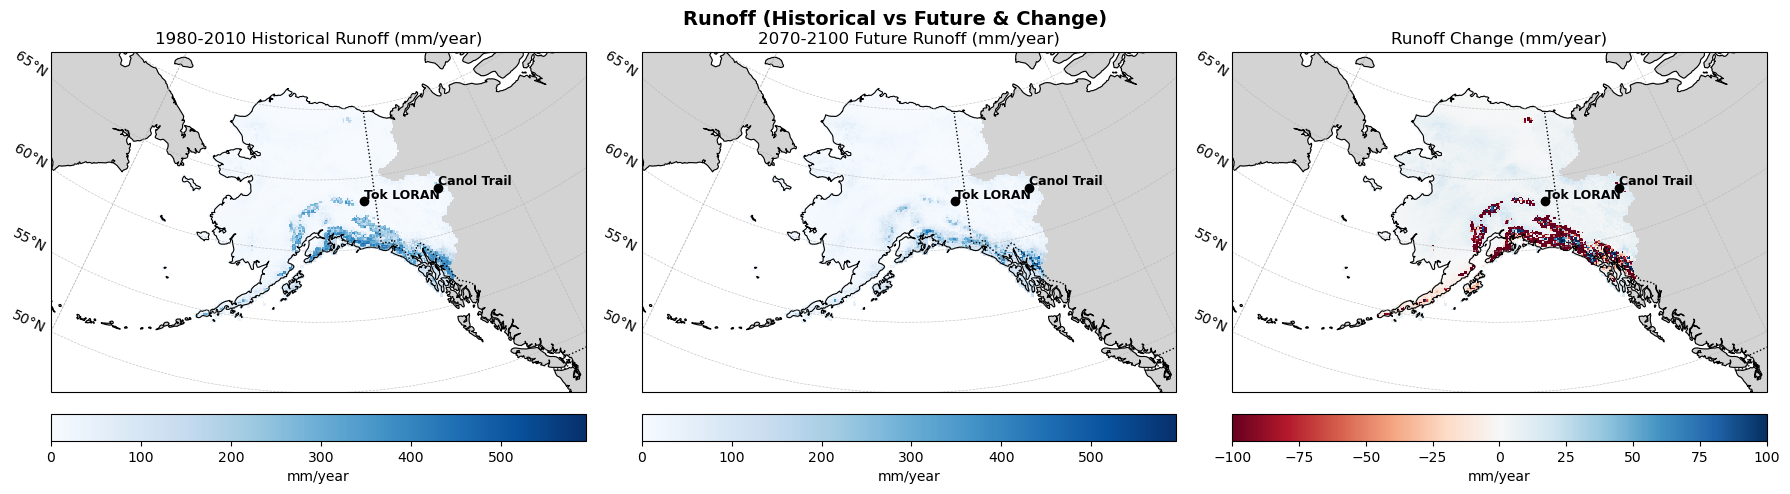

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


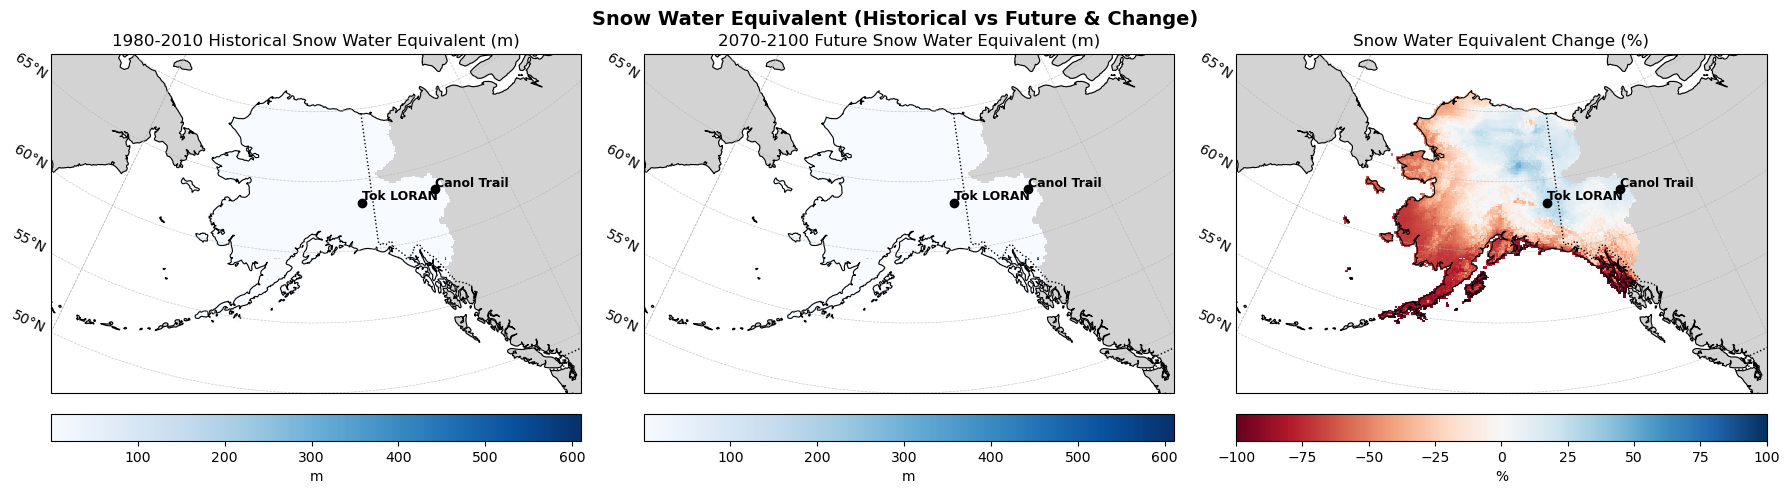

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


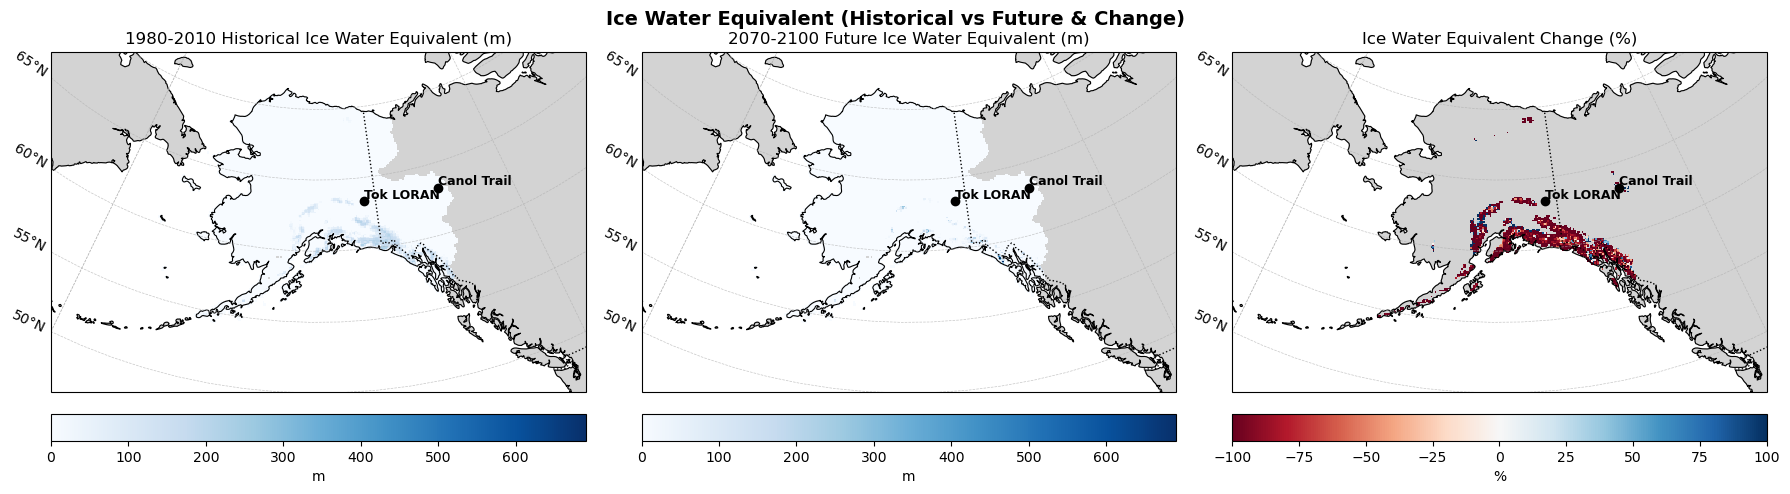

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

# Paths to data files
data_dir = "/glade/derecho/scratch/renatob/vic_alaska/output/"
variables = {
    "Runoff": ("RUNOFF", "cmip5_ensemble_wf_rcp45.nc", "mm/year"),
    "Snow Water Equivalent": ("SWE", "cmip5_ensemble_ws_rcp45.nc", "m"),
    "Ice Water Equivalent": ("IWE", "cmip5_ensemble_ws_rcp45.nc", "m"),
}

# Projection: Albers Equal Area centered on Alaska
proj = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=64, standard_parallels=(55, 65))

# Station Locations
stations = [
    {"name": "Tok LORAN", "lon": -142.8089, "lat": 63.3286},
    {"name": "Canol Trail", "lon": -130.98, "lat": 63.25},  # Approximate location
]

# Define function to compute mean and uncertainty
def compute_mean_and_uncertainty(ds, var):
    mean = ds[var].mean(dim="time")
    std_dev = ds[var].std(dim="time")  # Temporal uncertainty
    return mean, std_dev

# Define function to process and plot variables
def plot_variable_comparison(var_name, nc_info):
    nc_var, nc_file, unit = nc_info
    print(f"Processing {var_name} from {nc_file}...")

    # Load datasets
    ds = xr.open_dataset(data_dir + nc_file)
    ds_uncertainty = xr.open_dataset(data_dir + nc_file.replace(".nc", "_uncertainty.nc"))

    # Convert time to years
    ds["time"] = ds["time"].dt.year
    ds_uncertainty["time"] = ds_uncertainty["time"].dt.year

    # Define historical and future periods
    historical_range = (ds["time"] >= 1980) & (ds["time"] <= 2010)
    future_range = (ds["time"] >= 2070) & (ds["time"] <= 2100)

    # Compute historical and future means & uncertainties
    hist_mean, hist_std = compute_mean_and_uncertainty(ds.sel(time=historical_range), nc_var)
    fut_mean, fut_std = compute_mean_and_uncertainty(ds.sel(time=future_range), nc_var)

    # Compute ensemble uncertainty
    hist_uncert = ds_uncertainty[nc_var].sel(time=historical_range).mean(dim="time")
    fut_uncert = ds_uncertainty[nc_var].sel(time=future_range).mean(dim="time")

    # Compute final uncertainty propagation
    total_uncertainty_hist = np.sqrt(hist_std**2 + hist_uncert**2)
    total_uncertainty_fut = np.sqrt(fut_std**2 + fut_uncert**2)

    # Compute differences
    diff = fut_mean - hist_mean

    # Convert SWE and IWE from mm to meters and compute percentage change for difference plots only
    if var_name in ["Snow Water Equivalent", "Ice Water Equivalent"]:
        hist_mean /= 1000
        fut_mean /= 1000
        diff = ((fut_mean - hist_mean) / hist_mean) * 100  # % Change
        diff_unit = "%"  # SWE/IWE difference should be in percentage
    else:
        diff_unit = unit  # Runoff difference remains in mm/year

    # Extract lat/lon
    lat = ds["latitude"].isel(time=0)
    lon = ds["longitude"].isel(time=0)

    # Ensure historical and future plots share the same color scale
    hist_vmin, hist_vmax = np.nanmin(hist_mean), np.nanmax(fut_mean)

    # Set difference range for Runoff to -100 to 100 mm/year
    if var_name == "Runoff":
        diff_abs_max = 100  
    else:
        diff_abs_max = 100  # Fixed scale for SWE/IWE percentage change

    # Plot historical, future, and difference
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={"projection": proj})

    for ax, data, cmap, title, vmin, vmax in zip(
        axes,
        [hist_mean, fut_mean, diff],
        ["Blues", "Blues", "RdBu"],  # Blues for absolute plots, red-blue for difference
        [
            f"1980-2010 Historical {var_name} ({unit})",
            f"2070-2100 Future {var_name} ({unit})",
            f"{var_name} Change ({diff_unit})"
        ],
        [hist_vmin, hist_vmin, -diff_abs_max],  # Same limits for hist & future
        [hist_vmax, hist_vmax, diff_abs_max],   # Set difference limits symmetrically
    ):
        # Expand plot extent to show all of Alaska, including the peninsula
        ax.set_extent([-180, -120, 50, 72], crs=ccrs.PlateCarree())

        # Add base features
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)

        # Add latitude and longitude gridlines
        gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.7)
        gl.top_labels = False  # Hide top labels to avoid clutter
        gl.right_labels = False  # Hide right labels to avoid clutter
        gl.xlabel_style = {"size": 10, "color": "black"}
        gl.ylabel_style = {"size": 10, "color": "black"}

        # Contour plot
        im = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap=cmap, shading="auto", vmin=vmin, vmax=vmax)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.05)
        cbar.set_label(unit if "Change" not in title else diff_unit)

        # Add station locations
        for station in stations:
            ax.plot(station["lon"], station["lat"], marker="o", color="black", markersize=6, transform=ccrs.PlateCarree(), label=station["name"])
            ax.text(station["lon"], station["lat"], station["name"], transform=ccrs.PlateCarree(),
                    fontsize=9, ha="left", va="bottom", fontweight="bold")

        ax.set_title(title)

    plt.suptitle(f"{var_name} (Historical vs Future & Change)", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

# Run for each variable in RCP4.5 and RCP8.5
for scenario in ["rcp45", "rcp85"]:
    print(f"\n==== Processing {scenario.upper()} ====")
    for var, nc_info in variables.items():
        plot_variable_comparison(var, (nc_info[0], nc_info[1].replace("rcp45", scenario), nc_info[2]))



==== Processing RCP45 ====
Processing Runoff from cmip5_ensemble_wf_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


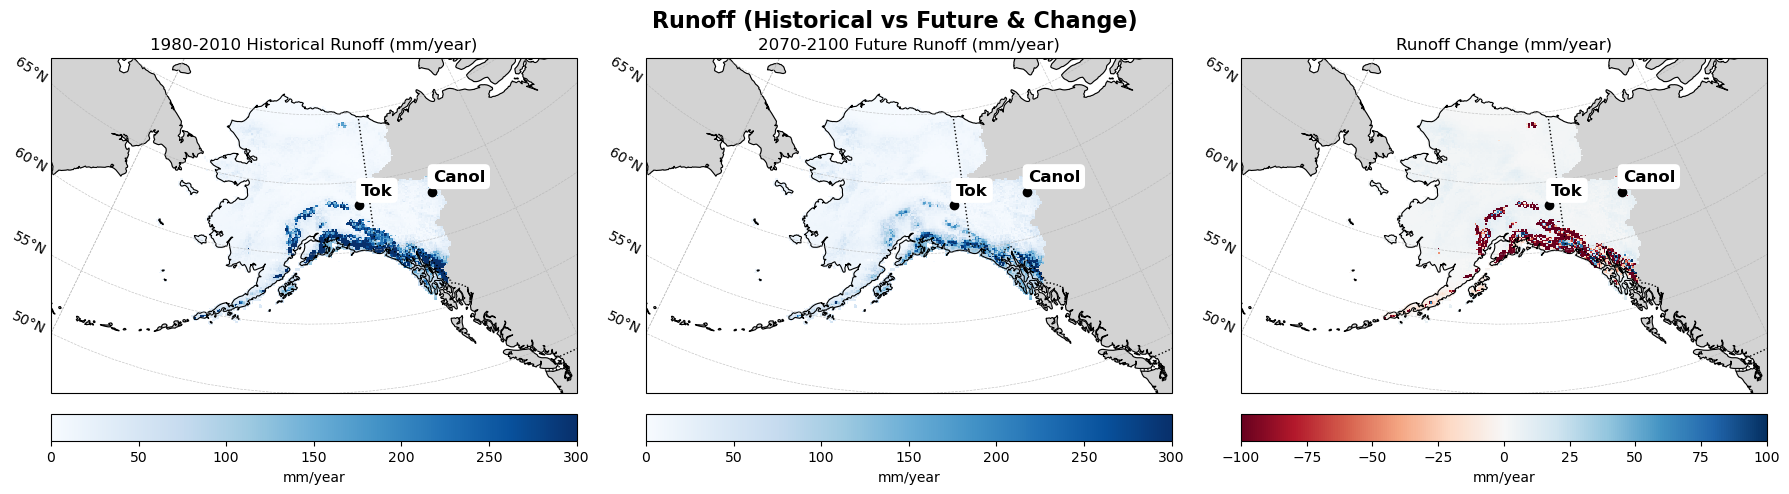

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


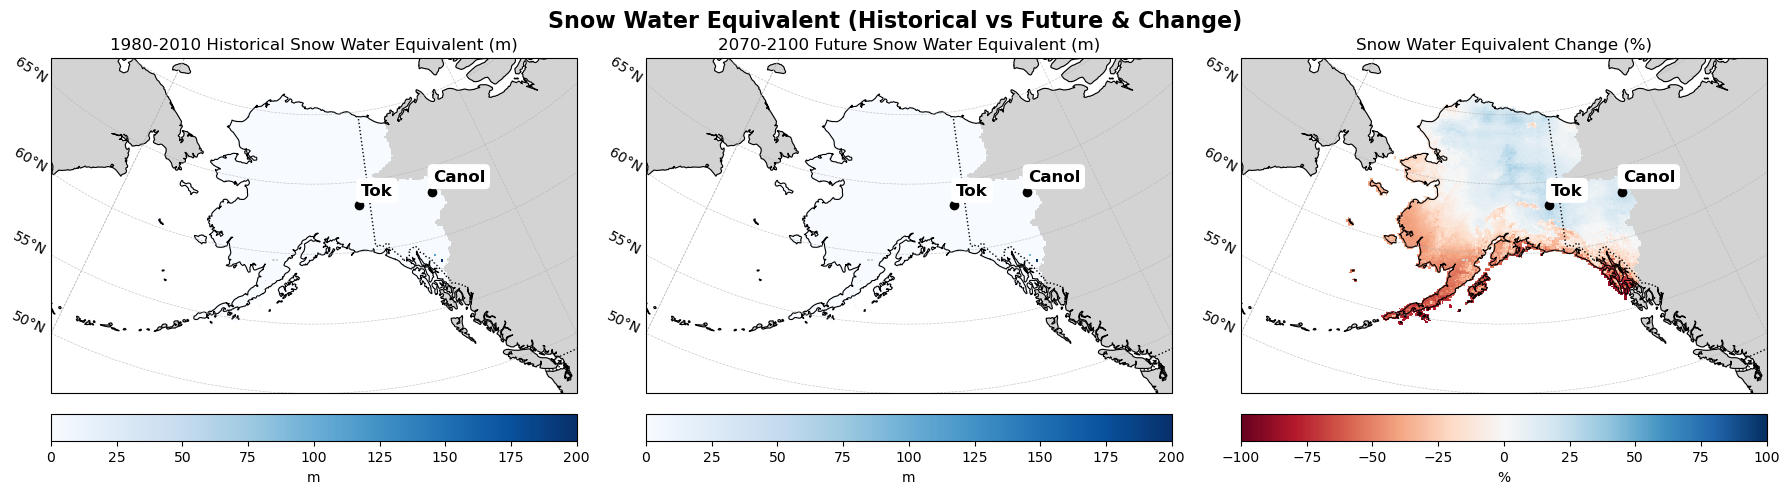

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


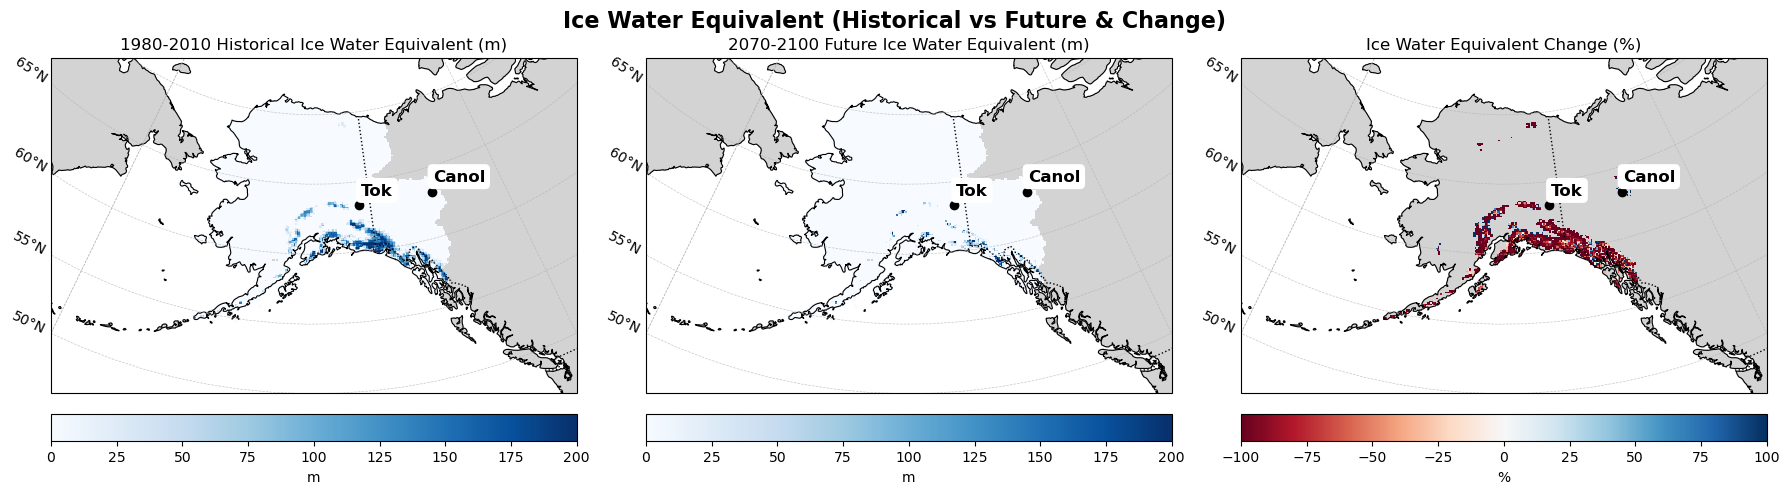


==== Processing RCP85 ====
Processing Runoff from cmip5_ensemble_wf_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


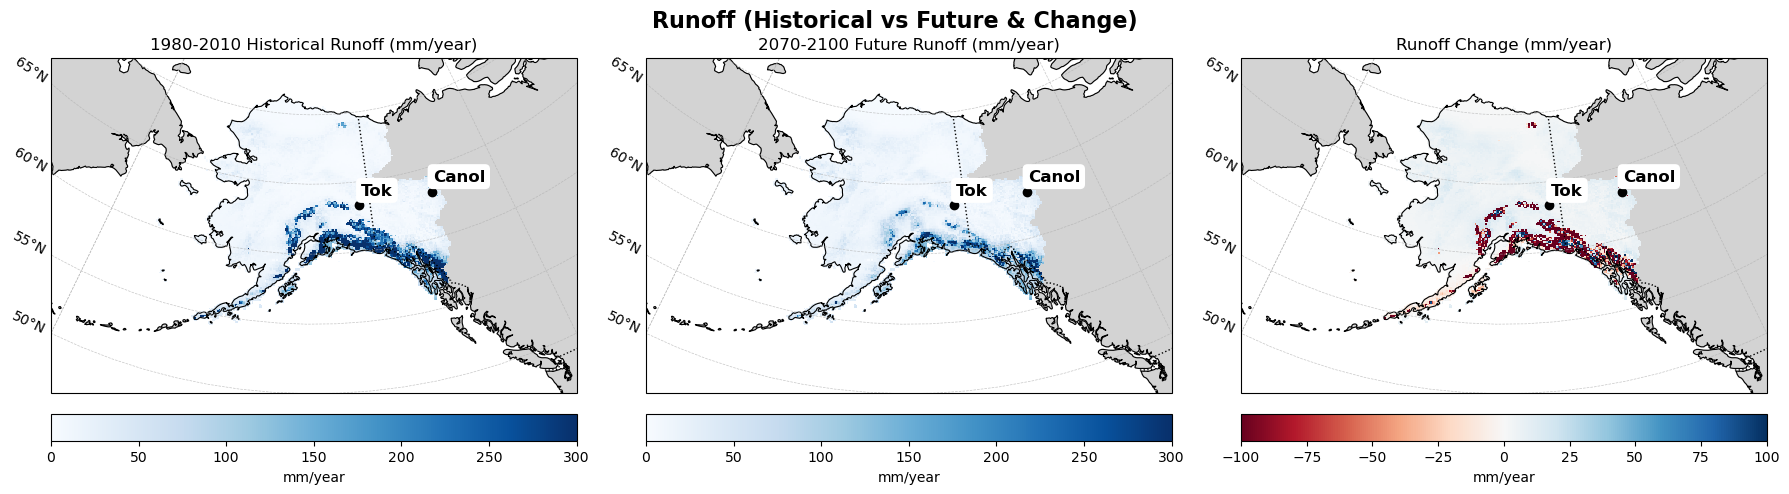

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


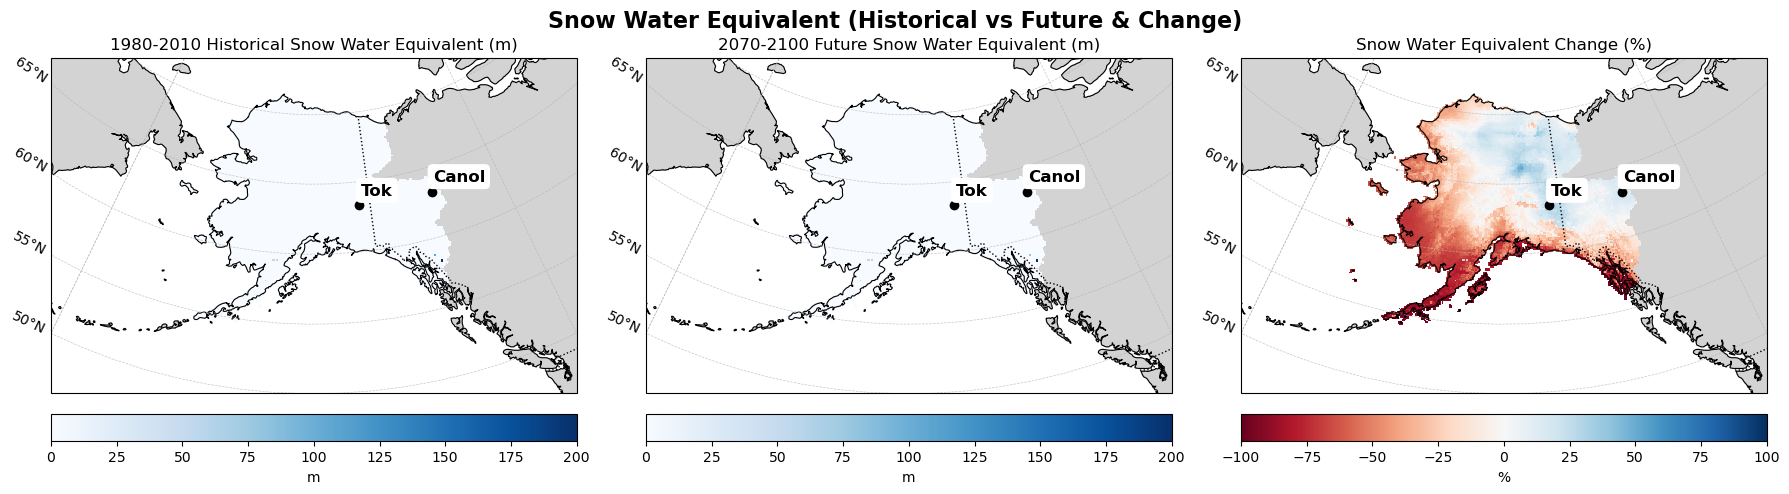

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


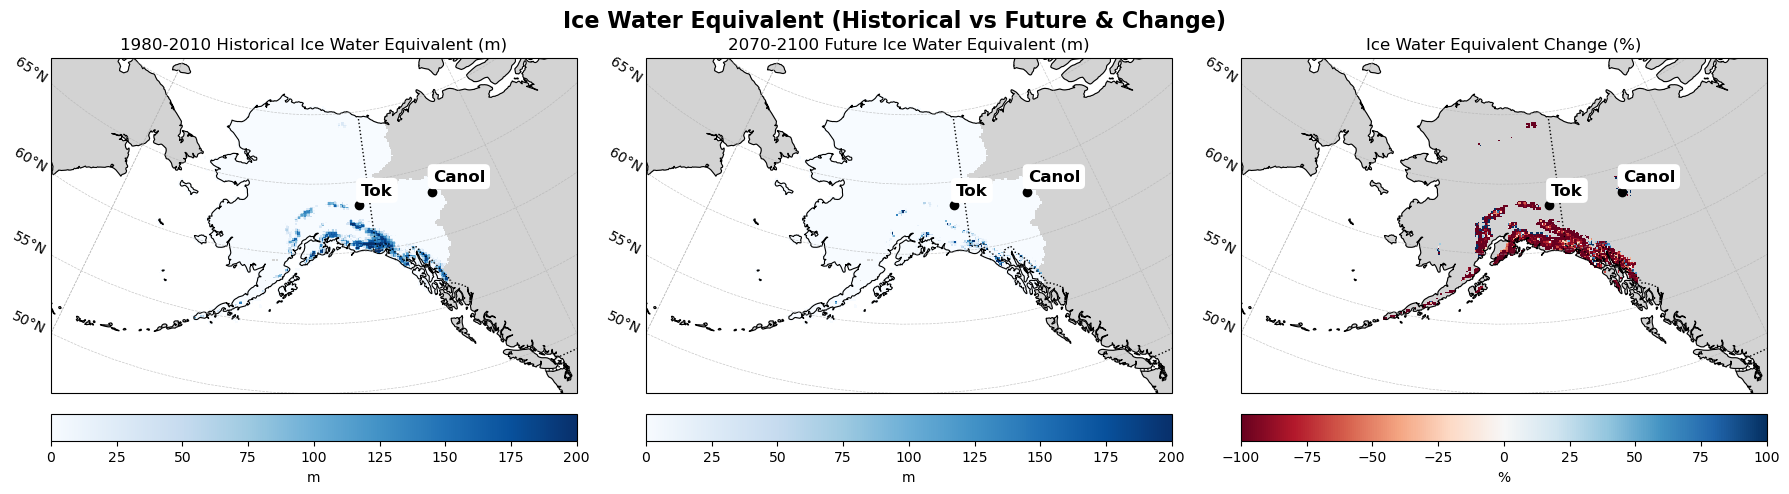

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

# Paths to data files
data_dir = "/glade/derecho/scratch/renatob/vic_alaska/output/"
variables = {
    "Runoff": ("RUNOFF", "cmip5_ensemble_wf_rcp45.nc", "mm/year"),
    "Snow Water Equivalent": ("SWE", "cmip5_ensemble_ws_rcp45.nc", "m"),
    "Ice Water Equivalent": ("IWE", "cmip5_ensemble_ws_rcp45.nc", "m"),
}

# Projection: Albers Equal Area centered on Alaska
proj = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=64, standard_parallels=(55, 65))

# Station Locations
stations = [
    {"name": "Tok", "lon": -142.8089, "lat": 63.3286},
    {"name": "Canol", "lon": -130.98, "lat": 63.25},
]

# Define function to compute mean and uncertainty
def compute_mean_and_uncertainty(ds, var):
    mean = ds[var].mean(dim="time")
    std_dev = ds[var].std(dim="time")  # Temporal uncertainty
    return mean, std_dev

# Define function to process and plot variables
def plot_variable_comparison(var_name, nc_info):
    nc_var, nc_file, unit = nc_info
    print(f"Processing {var_name} from {nc_file}...")

    # Load datasets
    ds = xr.open_dataset(data_dir + nc_file)
    ds_uncertainty = xr.open_dataset(data_dir + nc_file.replace(".nc", "_uncertainty.nc"))

    # Convert time to years
    ds["time"] = ds["time"].dt.year
    ds_uncertainty["time"] = ds_uncertainty["time"].dt.year

    # Define historical and future periods
    historical_range = (ds["time"] >= 1980) & (ds["time"] <= 2010)
    future_range = (ds["time"] >= 2070) & (ds["time"] <= 2100)

    # Compute historical and future means & uncertainties
    hist_mean, hist_std = compute_mean_and_uncertainty(ds.sel(time=historical_range), nc_var)
    fut_mean, fut_std = compute_mean_and_uncertainty(ds.sel(time=future_range), nc_var)

    # Compute ensemble uncertainty
    hist_uncert = ds_uncertainty[nc_var].sel(time=historical_range).mean(dim="time")
    fut_uncert = ds_uncertainty[nc_var].sel(time=future_range).mean(dim="time")

    # Compute final uncertainty propagation
    total_uncertainty_hist = np.sqrt(hist_std**2 + hist_uncert**2)
    total_uncertainty_fut = np.sqrt(fut_std**2 + fut_uncert**2)

    # Compute differences
    diff = fut_mean - hist_mean

    # Convert SWE and IWE from mm to meters and compute percentage change for difference plots only
    if var_name in ["Snow Water Equivalent", "Ice Water Equivalent"]:
        hist_mean /= 1000
        fut_mean /= 1000
        diff = ((fut_mean - hist_mean) / hist_mean) * 100  # % Change
        diff_unit = "%"  # SWE/IWE difference should be in percentage
    else:
        diff_unit = unit  # Runoff difference remains in mm/year

    # Extract lat/lon
    lat = ds["latitude"].isel(time=0)
    lon = ds["longitude"].isel(time=0)

    # **Ensure absolute plots (hist & future) have the same colorbar range**
    hist_vmin, hist_vmax = 0, 300 if var_name == "Runoff" else 200  # Runoff (0-300), SWE/IWE (0-200)

    # Set difference range for Runoff to -100 to 100 mm/year
    diff_abs_max = 100  

    # Plot historical, future, and difference
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={"projection": proj})

    for ax, data, cmap, title, vmin, vmax in zip(
        axes,
        [hist_mean, fut_mean, diff],
        ["Blues", "Blues", "RdBu"],  # Blues for absolute plots, red-blue for difference
        [
            f"1980-2010 Historical {var_name} ({unit})",
            f"2070-2100 Future {var_name} ({unit})",
            f"{var_name} Change ({diff_unit})"
        ],
        [hist_vmin, hist_vmin, -diff_abs_max],  # Same limits for hist & future
        [hist_vmax, hist_vmax, diff_abs_max],   # Set difference limits symmetrically
    ):
        # Expand plot extent to show all of Alaska, including the peninsula
        ax.set_extent([-180, -120, 50, 72], crs=ccrs.PlateCarree())

        # Add base features
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)

        # Add latitude gridlines only on the left
        gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.7)
        gl.top_labels = False  # Hide top labels to avoid clutter
        gl.right_labels = False  # Hide right labels to avoid clutter
        gl.xlabel_style = {"size": 10, "color": "black"}
        gl.ylabel_style = {"size": 10, "color": "black"}

        # Contour plot
        im = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap=cmap, shading="auto", vmin=vmin, vmax=vmax)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.05)
        cbar.set_label(unit if "Change" not in title else diff_unit)

        # **Increase label size for stations & fix placement**
        for station in stations:
            ax.plot(station["lon"], station["lat"], marker="o", color="black", markersize=6, transform=ccrs.PlateCarree())
            ax.text(station["lon"] + 0.5, station["lat"] + 0.5, station["name"], transform=ccrs.PlateCarree(),
                    fontsize=12, ha="left", va="bottom", fontweight="bold", bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

        ax.set_title(title, fontsize=12)

    plt.suptitle(f"{var_name} (Historical vs Future & Change)", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

# Run for each variable in RCP4.5 and RCP8.5
for scenario in ["rcp45", "rcp85"]:
    print(f"\n==== Processing {scenario.upper()} ====")
    for var, nc_info in variables.items():
        plot_variable_comparison(var, (nc_info[0], nc_info[1].replace("rcp45", scenario), nc_info[2]))



==== Processing RCP45 ====
Processing Runoff from cmip5_ensemble_wf_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


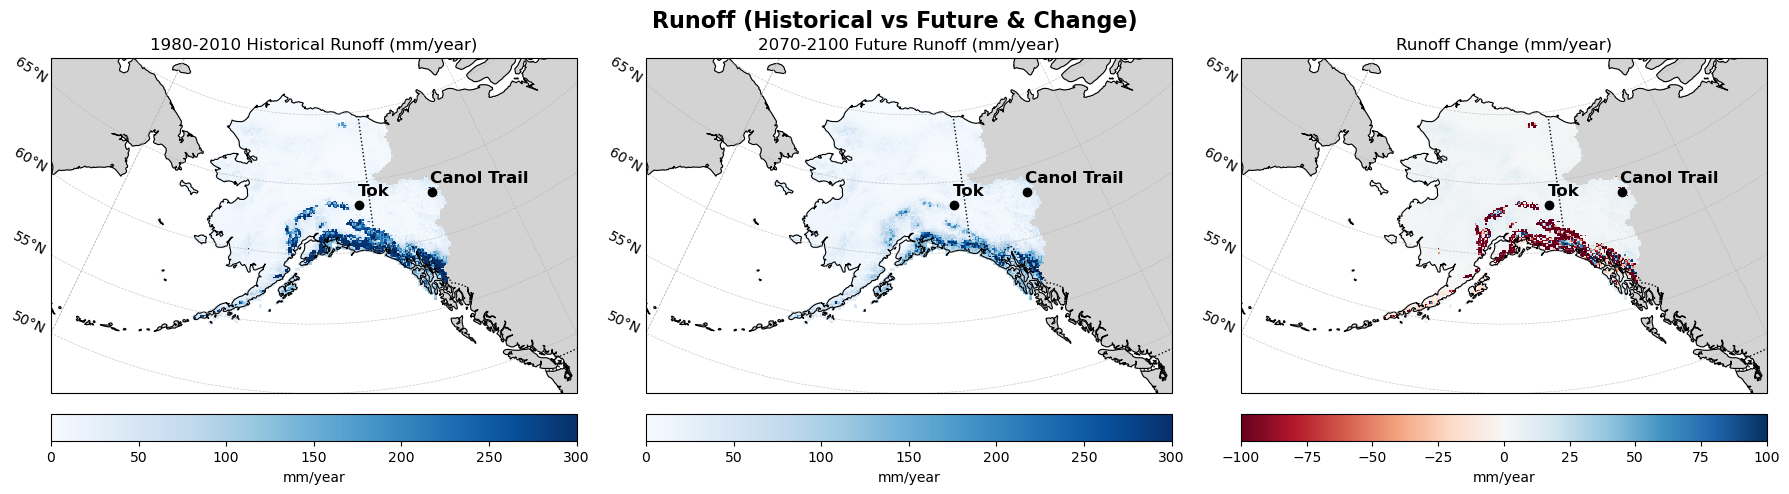

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


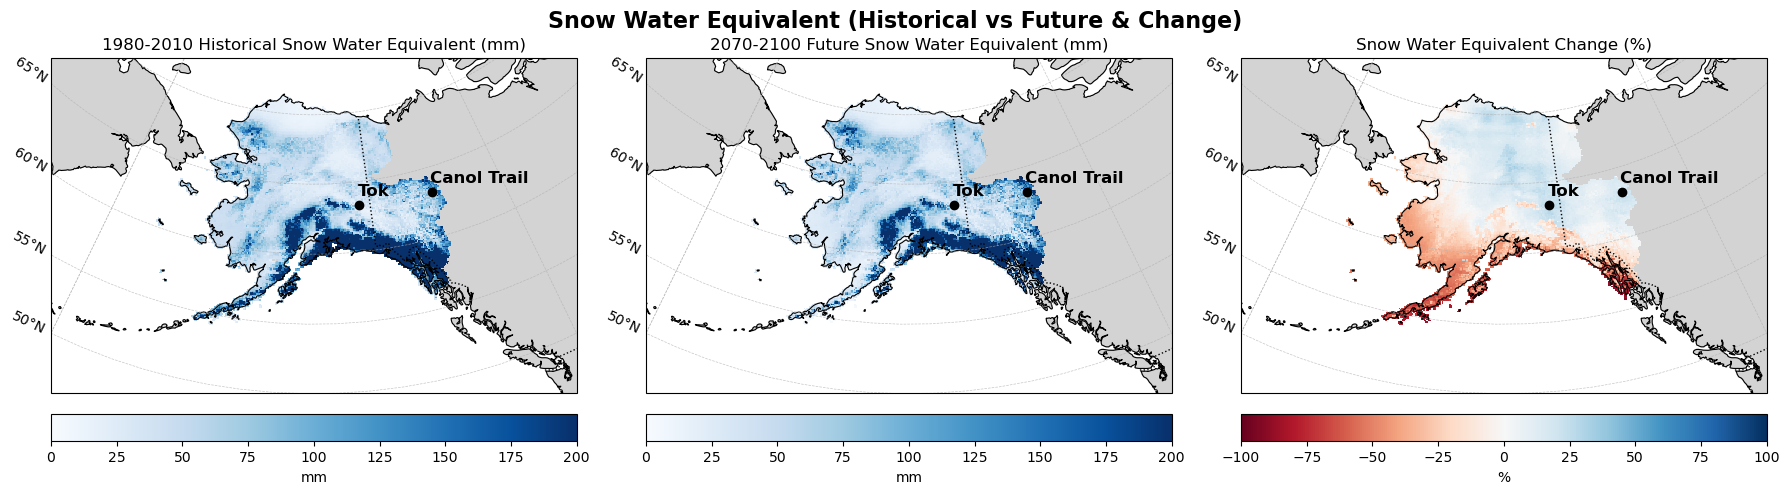

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp45.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


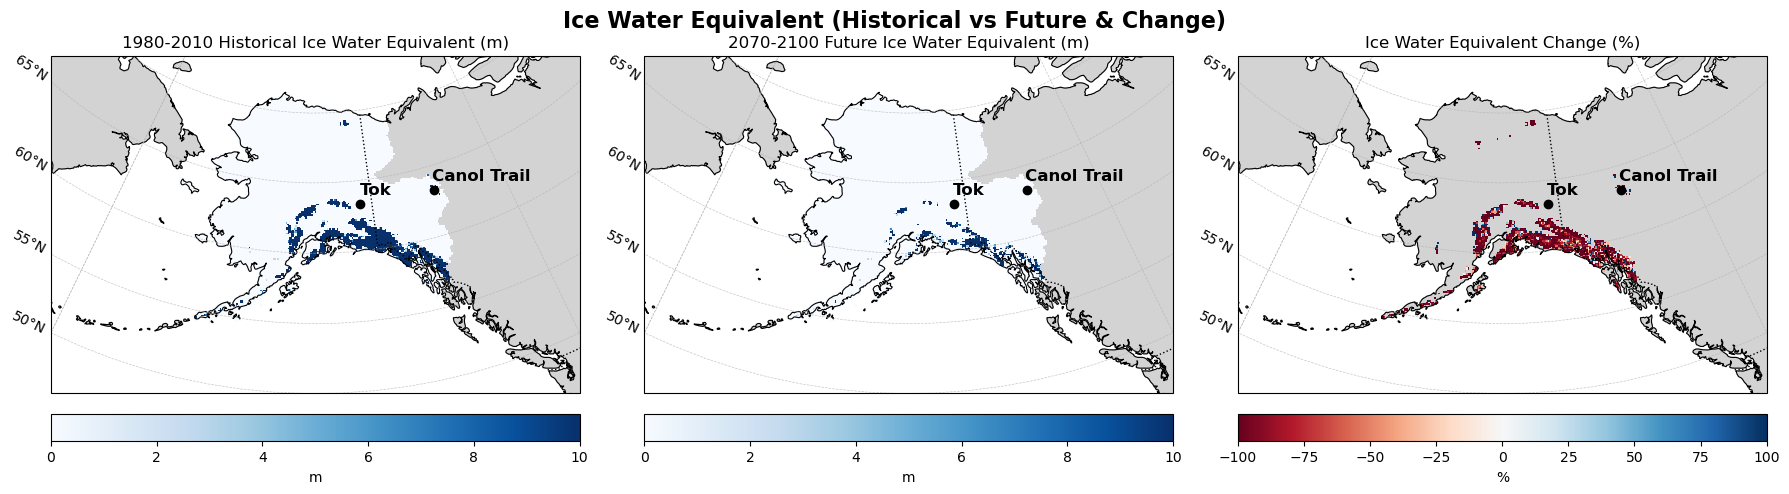


==== Processing RCP85 ====
Processing Runoff from cmip5_ensemble_wf_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


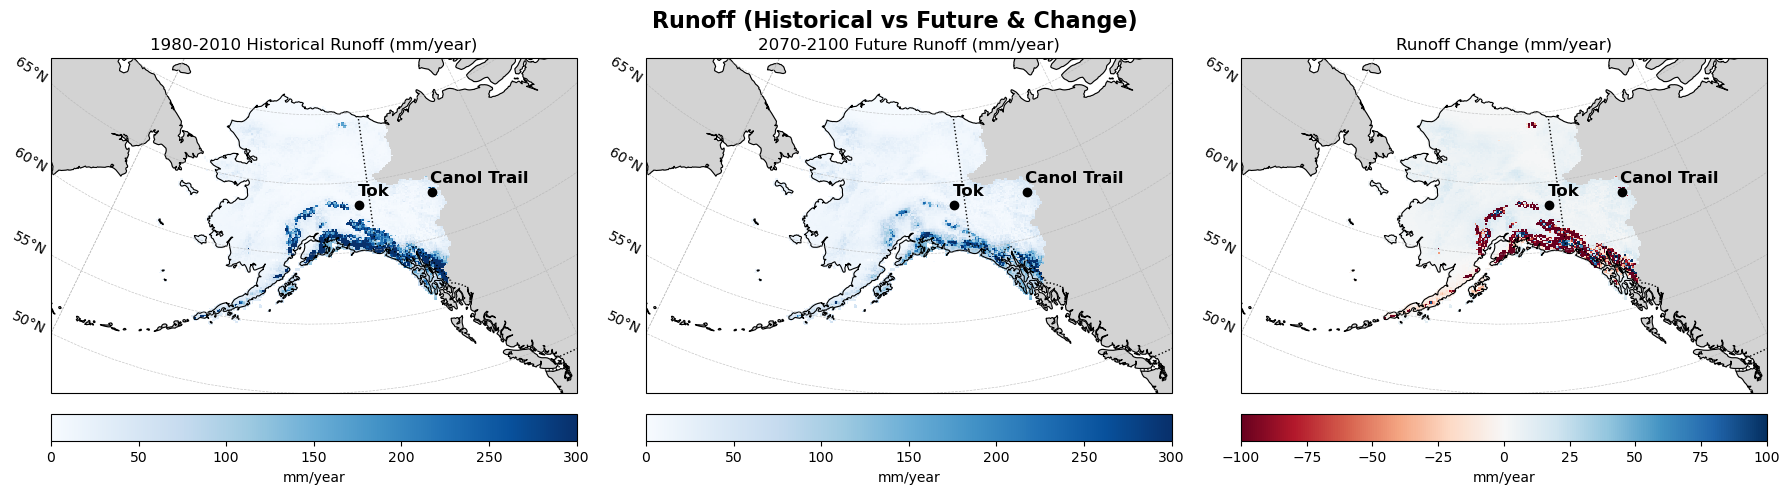

Processing Snow Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


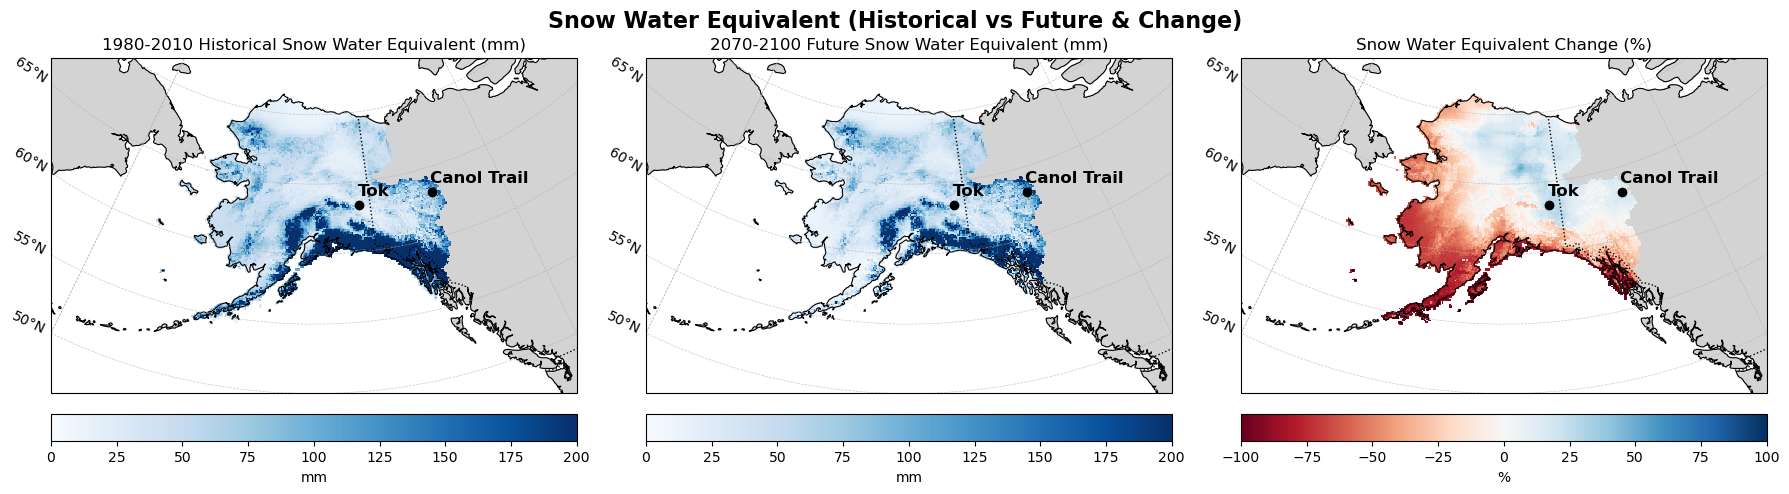

Processing Ice Water Equivalent from cmip5_ensemble_ws_rcp85.nc...


/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/renatob/conda-envs/vic_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


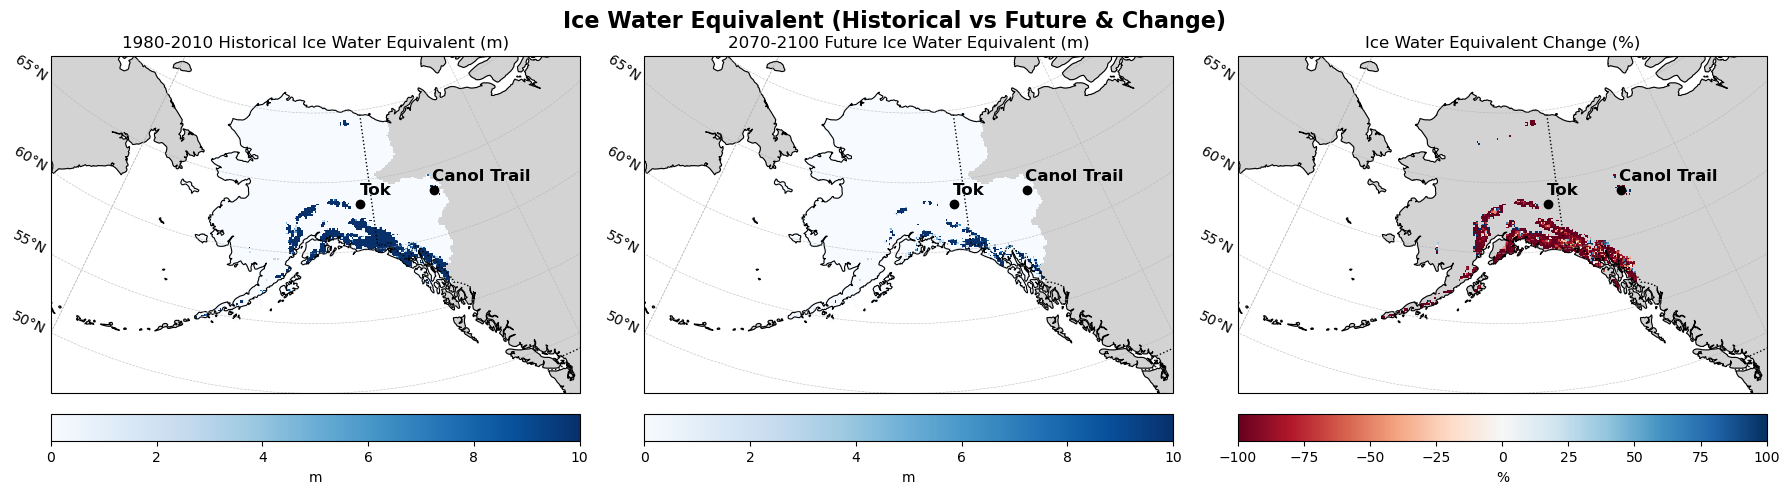

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

# Paths to data files
data_dir = "/glade/derecho/scratch/renatob/vic_alaska/output/"
variables = {
    "Runoff": ("RUNOFF", "cmip5_ensemble_wf_rcp45.nc", "mm/year"),
    "Snow Water Equivalent": ("SWE", "cmip5_ensemble_ws_rcp45.nc", "mm"),
    "Ice Water Equivalent": ("IWE", "cmip5_ensemble_ws_rcp45.nc", "m"),
}

# Projection: Albers Equal Area centered on Alaska
proj = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=64, standard_parallels=(55, 65))

# Station Locations
stations = [
    {"name": "Tok", "lon": -142.8089, "lat": 63.3286},
    {"name": "Canol Trail", "lon": -130.98, "lat": 63.25},
]

# Define function to compute mean and uncertainty
def compute_mean_and_uncertainty(ds, var):
    mean = ds[var].mean(dim="time")
    std_dev = ds[var].std(dim="time")  # Temporal uncertainty
    return mean, std_dev

# Define function to process and plot variables
def plot_variable_comparison(var_name, nc_info):
    nc_var, nc_file, unit = nc_info
    print(f"Processing {var_name} from {nc_file}...")

    # Load datasets
    ds = xr.open_dataset(data_dir + nc_file)
    ds_uncertainty = xr.open_dataset(data_dir + nc_file.replace(".nc", "_uncertainty.nc"))

    # Convert time to years
    ds["time"] = ds["time"].dt.year
    ds_uncertainty["time"] = ds_uncertainty["time"].dt.year

    # Define historical and future periods
    historical_range = (ds["time"] >= 1980) & (ds["time"] <= 2010)
    future_range = (ds["time"] >= 2070) & (ds["time"] <= 2100)

    # Compute historical and future means & uncertainties
    hist_mean, hist_std = compute_mean_and_uncertainty(ds.sel(time=historical_range), nc_var)
    fut_mean, fut_std = compute_mean_and_uncertainty(ds.sel(time=future_range), nc_var)

    # Compute ensemble uncertainty
    hist_uncert = ds_uncertainty[nc_var].sel(time=historical_range).mean(dim="time")
    fut_uncert = ds_uncertainty[nc_var].sel(time=future_range).mean(dim="time")

    # Compute final uncertainty propagation
    total_uncertainty_hist = np.sqrt(hist_std**2 + hist_uncert**2)
    total_uncertainty_fut = np.sqrt(fut_std**2 + fut_uncert**2)

    # Compute differences
    diff = fut_mean - hist_mean

    # Convert IWE from mm to meters in absolute plots, but keep SWE in mm
    if var_name == "Ice Water Equivalent":
        hist_mean /= 1000  # Convert from mm to meters
        fut_mean /= 1000

    # Compute percentage change for difference plots
    if var_name in ["Snow Water Equivalent", "Ice Water Equivalent"]:
        diff = ((fut_mean - hist_mean) / hist_mean) * 100  # Compute % Change
        diff_unit = "%"  # SWE/IWE difference should be in percentage
    else:
        diff_unit = unit  # Runoff difference remains in mm/year

    # Extract lat/lon
    lat = ds["latitude"].isel(time=0)
    lon = ds["longitude"].isel(time=0)

    # Ensure absolute plots (hist & future) have the same colorbar range
    if var_name == "Runoff":
        hist_vmin, hist_vmax = 0, 300  # Runoff (0-300 mm/year)
    elif var_name == "Snow Water Equivalent":
        hist_vmin, hist_vmax = 0, 200  # SWE (0-50 m)
    elif var_name == "Ice Water Equivalent":
        hist_vmin, hist_vmax = 0, 10  # IWE (0-10 m)


    # Set difference range for Runoff to -100 to 100 mm/year
    diff_abs_max = 100  

    # Plot historical, future, and difference
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={"projection": proj})

    for ax, data, cmap, title, vmin, vmax in zip(
        axes,
        [hist_mean, fut_mean, diff],
        ["Blues", "Blues", "RdBu"],  # Blues for absolute plots, red-blue for difference
        [
            f"1980-2010 Historical {var_name} ({unit})",
            f"2070-2100 Future {var_name} ({unit})",
            f"{var_name} Change ({diff_unit})"
        ],
        [hist_vmin, hist_vmin, -diff_abs_max],  # Same limits for hist & future
        [hist_vmax, hist_vmax, diff_abs_max],   # Set difference limits symmetrically
    ):
        # Expand plot extent to show all of Alaska, including the peninsula
        ax.set_extent([-180, -120, 50, 72], crs=ccrs.PlateCarree())

        # Add base features
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)

        # Add latitude gridlines only on the left
        gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.7)
        gl.top_labels = False  # Hide top labels to avoid clutter
        gl.right_labels = False  # Hide right labels to avoid clutter
        gl.xlabel_style = {"size": 10, "color": "black"}
        gl.ylabel_style = {"size": 10, "color": "black"}

        # Contour plot
        im = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap=cmap, shading="auto", vmin=vmin, vmax=vmax)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.05)
        cbar.set_label(unit if "Change" not in title else diff_unit)

        # **Correct station labels (Tok Loran Station & Canol Trail Pump Station 2)**
        for station in stations:
            ax.plot(station["lon"], station["lat"], marker="o", color="black", markersize=6, transform=ccrs.PlateCarree())
            ax.text(station["lon"], station["lat"] + 0.5, station["name"], transform=ccrs.PlateCarree(),
                    fontsize=12, ha="left", va="bottom", fontweight="bold")

        ax.set_title(title, fontsize=12)

    plt.suptitle(f"{var_name} (Historical vs Future & Change)", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

# Run for each variable in RCP4.5 and RCP8.5
for scenario in ["rcp45", "rcp85"]:
    print(f"\n==== Processing {scenario.upper()} ====")
    for var, nc_info in variables.items():
        plot_variable_comparison(var, (nc_info[0], nc_info[1].replace("rcp45", scenario), nc_info[2]))


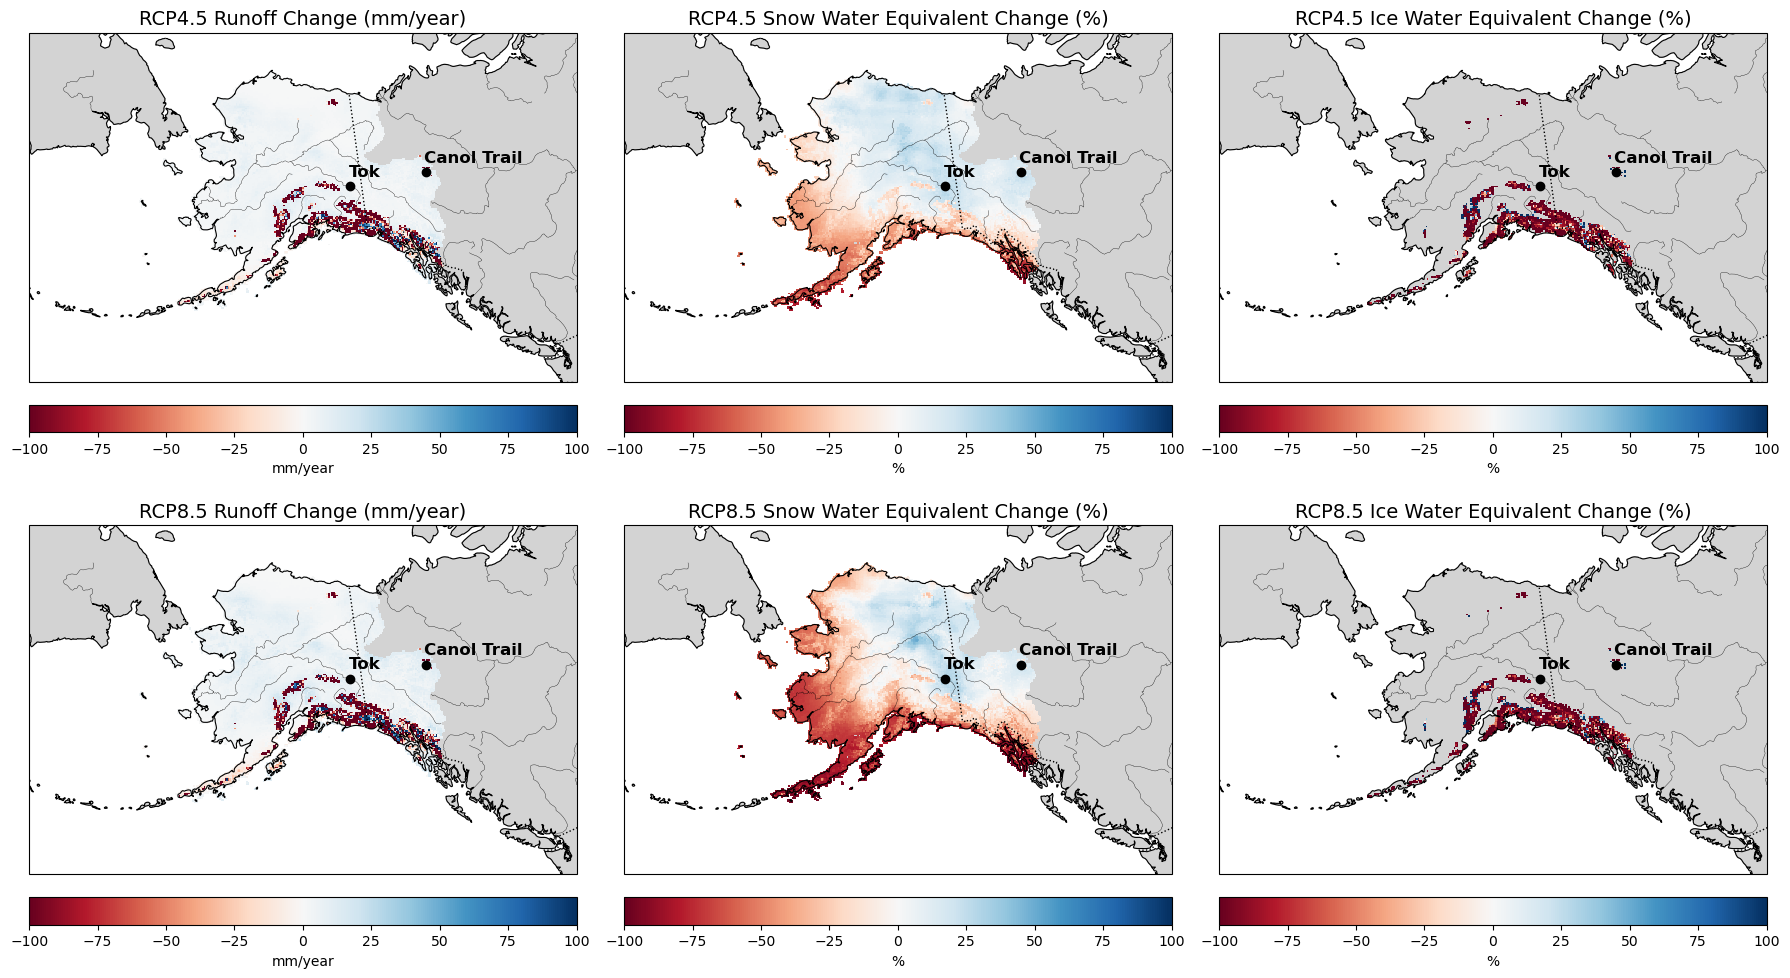

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Paths to data files
data_dir = "/glade/derecho/scratch/renatob/vic_alaska/output/"
variables = {
    "Runoff": ("RUNOFF", "cmip5_ensemble_wf_rcp45.nc", "mm/year"),
    "Snow Water Equivalent": ("SWE", "cmip5_ensemble_ws_rcp45.nc", "%"),
    "Ice Water Equivalent": ("IWE", "cmip5_ensemble_ws_rcp45.nc", "%"),
}

# Projection settings
proj = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=64, standard_parallels=(55, 65))

# Station locations
stations = [
    {"name": "Tok", "lon": -142.8089, "lat": 63.3286},
    {"name": "Canol Trail", "lon": -130.98, "lat": 63.25},
]

# Function to process data and compute differences
def compute_difference(var_name, nc_file):
    ds_45 = xr.open_dataset(data_dir + nc_file.replace("rcp45", "rcp45"))
    ds_85 = xr.open_dataset(data_dir + nc_file.replace("rcp45", "rcp85"))

    # Convert time to years
    ds_45["time"] = ds_45["time"].dt.year
    ds_85["time"] = ds_85["time"].dt.year

    # Define historical and future periods
    historical_range = (ds_45["time"] >= 1980) & (ds_45["time"] <= 2010)
    future_range = (ds_45["time"] >= 2070) & (ds_45["time"] <= 2100)

    # Compute means
    hist_mean_45 = ds_45[var_name].sel(time=historical_range).mean(dim="time")
    fut_mean_45 = ds_45[var_name].sel(time=future_range).mean(dim="time")
    hist_mean_85 = ds_85[var_name].sel(time=historical_range).mean(dim="time")
    fut_mean_85 = ds_85[var_name].sel(time=future_range).mean(dim="time")

    # Compute difference (Future - Historical)
    diff_45 = fut_mean_45 - hist_mean_45
    diff_85 = fut_mean_85 - hist_mean_85

    # Convert SWE and IWE differences to percentage change
    if var_name in ["SWE", "IWE"]:
        diff_45 = ((fut_mean_45 - hist_mean_45) / hist_mean_45) * 100
        diff_85 = ((fut_mean_85 - hist_mean_85) / hist_mean_85) * 100

    return diff_45, diff_85, ds_45["latitude"].isel(time=0), ds_45["longitude"].isel(time=0)

# Define plot settings
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={"projection": proj})

# Loop through variables and scenarios
for i, (var_name, (nc_var, nc_file, unit)) in enumerate(variables.items()):
    diff_45, diff_85, lat, lon = compute_difference(nc_var, nc_file)

    # Define colorbar limits
    diff_abs_max = 100 if var_name in ["SWE", "IWE"] else 100

    # Titles
    titles = [
        f"RCP4.5 {var_name} Change ({unit})",
        f"RCP8.5 {var_name} Change ({unit})"
    ]

    # Plot RCP4.5 (Top Row)
    for j, diff_data in enumerate([diff_45, diff_85]):
        ax = axes[j, i]
        ax.set_extent([-180, -120, 50, 72], crs=ccrs.PlateCarree())

        # Add base map features
        ax.add_feature(cfeature.LAND, color="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=1)
        ax.add_feature(cfeature.RIVERS, edgecolor="black", linewidth=0.25)  # **Add rivers**

        # Contour plot
        im = ax.pcolormesh(
            lon, lat, diff_data,
            transform=ccrs.PlateCarree(), cmap="RdBu",
            shading="auto", vmin=-diff_abs_max, vmax=diff_abs_max
        )

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, orientation="horizontal", pad=0.05)
        cbar.set_label(unit)

        # Add station locations
        for station in stations:
            ax.plot(station["lon"], station["lat"], marker="o", color="black", markersize=6, transform=ccrs.PlateCarree())
            ax.text(station["lon"], station["lat"] + 0.5, station["name"], transform=ccrs.PlateCarree(),
                    fontsize=12, ha="left", va="bottom", fontweight="bold")

        ax.set_title(titles[j], fontsize=14)

# Adjust layout and save the figure
#plt.suptitle("Climate Model Differences: RCP4.5 vs RCP8.5", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.savefig("Fig1.png", dpi=300)
plt.show()
